# PART 1 : EDA

STEP 1 : GETTING INFORMATION ABOUT THE DATASET

In [45]:
# Loading librairie needed
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import plotly.express as px

# To hide warning log
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Loading dataset
dataset = pd.read_csv("src/conversion_data_train.csv")

In [47]:
# Visualize the 5 first rows
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [48]:
# Checking the shape
dataset.shape

(284580, 6)

STEP 2 : MISSING VALUE MANAGEMENT

In [49]:
dataset.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

STEP 3 : GETTING A SAMPLE OF THE DATASET

In [50]:
# Creating a dataset with 10000 observations
data = dataset.sample(10000)

STEP 4 : REPLACING THE NUMBER BY CORRESPONDING NAME CATEGORY

In [51]:
data['new_user'] = data["new_user"].apply(lambda x : "Yes" if x == 1 else "No")

In [52]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
6142,US,18,Yes,Seo,5,0
165417,UK,26,Yes,Direct,6,0
144422,China,37,No,Seo,3,0
73775,US,37,Yes,Direct,2,0
37878,US,26,Yes,Ads,5,0


STEP 5 : EXPLORATION DATA ANALYSIS USERS PROFILE

In [53]:
fig1 = px.histogram(data["converted"], 
            histnorm= 'percent', 
            title="Percent converted", 
            text_auto=True)

fig1.update_layout(autosize=True, 
                    width=500,
                    height=500
                    )
fig1.show()

In [54]:
fig2 = px.histogram(data["country"], 
            histnorm= 'percent', 
            title="Percent country", 
            text_auto=True, 
            category_orders=dict(country=["US", "China", "UK", "Germany"])).update_xaxes(categoryorder='total descending')

fig2.update_layout(autosize=True, 
                    width=600,
                    height=500)
fig2.show()

In [55]:
fig3 = px.histogram(data["age"], 
            title="Age repartition", 
            text_auto=True, 
            nbins=10)

fig3.update_layout(autosize=True, 
                    width=600,
                    height=500)
fig3.show()

In [56]:
fig4 = px.histogram(data["new_user"], 
            title="New user repartition", 
            histnorm= 'percent',
            text_auto=True, 
            nbins=10)

fig4.update_layout(autosize=True, 
                    width=600,
                    height=500)
fig4.show()

In [57]:
fig5 = px.histogram(data["source"], 
            histnorm= 'percent', 
            title="Percent source", 
            text_auto=True).update_xaxes(categoryorder='total descending')

fig5.update_layout(autosize=True, 
                    width=600,
                    height=500)
fig5.show()

In [58]:
fig6 = px.histogram(data["total_pages_visited"], 
            title="Number of visited pages by users", 
            nbins=10,
            text_auto=True).update_xaxes(categoryorder='total descending')

fig6.update_layout(autosize=True, 
                    width=600,
                    height=500)
fig6.show()

STEP 6 : PREPROCESSSING

In [59]:
# Recall of the dataset
data.head()

,country,age,new_user,source,total_pages_visited,converted
6142,US,18,Yes,Seo,5,0
165417,UK,26,Yes,Direct,6,0
144422,China,37,No,Seo,3,0
73775,US,37,Yes,Direct,2,0
37878,US,26,Yes,Ads,5,0


In [60]:
# Getting the list of columns
columns_list = data.columns.to_list()

In [61]:
# Splitting the name of features from the target variable
features_list = columns_list[:-1]
target_variable = "converted"

In [62]:
# Separating features from the target variable
X = data.loc[:, features_list]
y = data.loc[:, target_variable]

In [63]:
# Dividing dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.1, 
                                                    random_state=42)

In [64]:
# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns # Automatically detect positions of numeric columns
numeric_transformer = StandardScaler()

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns # Automatically detect positions of categorical columns
categorical_transformer = OneHotEncoder(drop='first') # first column will be dropped to avoid creating correlations between features

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train) # Preprocessing influenceur
X_test = preprocessor.transform(X_test) # Preprocessing copieur

print(f'numeric_features : {numeric_features}')
print(f'categorical_features : {categorical_features}')

numeric_features : Index(['age', 'total_pages_visited'], dtype='object')
categorical_features : Index(['country', 'new_user', 'source'], dtype='object')


STEP 7 : TRAINING MODEL : LOGISTIC REGRESSION - WITH DATA_TRAIN.CSV

In [65]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

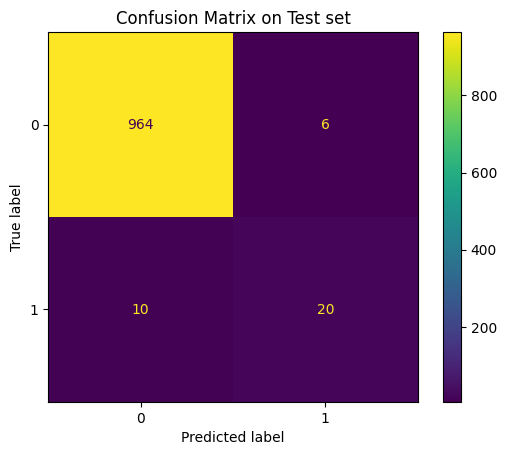

In [67]:
from IPython.display import clear_output
clear_output(wait=True) 

_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on Test set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) 
plt.show()

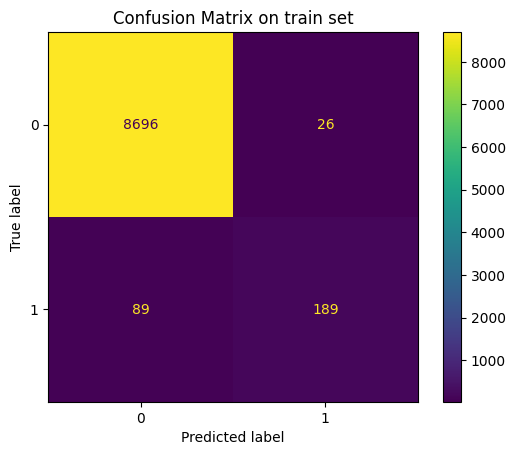

In [68]:
_ , ax = plt.subplots() 
ax.set(title="Confusion Matrix on train set") 
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) 
plt.show()

In [69]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set: ", f1_score(y_test, y_test_pred))

f1-score on train set :  0.7667342799188641
f1-score on test set:  0.7142857142857142


# END PART 1